
# Project: Investigate a Dataset (TMDb movie data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset was taken from The Movie Database (TMDb), "a community built movie and TV database" (www.themoviedb.org/about) Each row corresponds to a movie and includes a range of data about each film. Relevant data to be used in the following analysis include the following variables:
    - original_title
    - genres
    - release_date
    - release_year

> In this report, I explore the following questions:
    1. What are the genres that produce top profit?
    2. How is popularity trending over time?
    3. Do top ratings movies always generate big revenue?
    4. Do higher budget movies always generate big revenue?
    5. When was the most number of movies produced?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data

df = pd.read_csv("tmdb-movies.csv")
df.head()

#   types and look for instances of missing or possibly errant data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Here we have found that there is missing data so we are going to deal with it.

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df.drop(["imdb_id","overview","keywords"] , axis = 1 , inplace = True)
df

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


### Here we have dropped the columns that we will not work on it to make the (df) more simplified

In [5]:
print(df.duplicated().sum())

1


### Here we have checked if there is duplication in the (df) or no and we have found one duplication.

In [6]:
df.drop_duplicates(inplace=True)

### Here we have dropped the duplication we found.

In [7]:
print(df.duplicated().sum())

0


### Here we have checked again if there is duplication or not after we have done the drop operation.

In [8]:
df.isnull().sum().any()

True

### Here we have checked about nulls in our (df).

In [9]:
df.dropna(inplace=True)


### Here we have dropped the nulls we found.

In [10]:
df.isnull().sum().any()

False

### Here we have checked again if there are nulls or not after we have done the drop operation.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 10819
Data columns (total 18 columns):
id                      2141 non-null int64
popularity              2141 non-null float64
budget                  2141 non-null int64
revenue                 2141 non-null int64
original_title          2141 non-null object
cast                    2141 non-null object
homepage                2141 non-null object
director                2141 non-null object
tagline                 2141 non-null object
runtime                 2141 non-null int64
genres                  2141 non-null object
production_companies    2141 non-null object
release_date            2141 non-null object
vote_count              2141 non-null int64
vote_average            2141 non-null float64
release_year            2141 non-null int64
budget_adj              2141 non-null float64
revenue_adj             2141 non-null float64
dtypes: float64(4), int64(6), object(8)
memory usage: 317.8+ KB


### Here we have done some operation on the (df) to make it more clear and simplified so that it's ready to be used.

<a id='eda'></a>
## Exploratory Data Analysis



### Making a new column called profit

In [12]:
df["profit"] = df["revenue"] - df["budget"]

### Q1 answer : ( What genres of movies that make highest profit? )

In [13]:
def Q_1(df): 
    ## A set of codes to find the genres of movies that make highest profit
    df_new1 = df.sort_values( ["profit"] , ascending=[False] ).head(20) # you can adjust the number of head as you want.
    x = df_new1["genres"].mode()[0]
    print("Genres of movies that make highest profit : ",x)
    
    return df

### Q2 answer :  ( How is popularity trending overtime ?) ==> you can adjust the year you want below 

In [14]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
def Q_2(df):
    
    ## A set of codes to extract the year from the date.
    df["release_date"] = pd.to_datetime(df["release_date"])
    df["year"] = df["release_date"].dt.year

    ## A set of code to filter the dataframe about the year I want to show.
    C_G_Y = df.loc[df["year"]== 2012 ] # here you can choose the year you want to show the most common genres in that year.
    
    ## A set of code to find how is popularity trending in that year.
    y=C_G_Y["genres"].mode()[0]
    print("The genres trending in that year : ",y)
    
    return df



### 1) Finding top rating movie

In [15]:
def top_rating_movie(df):
    
    ## A set of codes to find the top rated movie.
    df_new2 = df.sort_values( ["vote_average"] , ascending=[False] ).head(1) # you can adjust the number of head as you want.
    top_rated_movie=df_new2["original_title"]
    a=top_rated_movie
    print("Top rating movie is : ",a)
    
    return df

### 2) Finding top revenue movie

In [16]:
def top_revenue_movie(df):
    
    ## A set of codes to find the top revenue movie.
    df_new3 = df.sort_values( ["revenue"] , ascending=[False] ).head(1) # you can adjust the number of head as you want.
    top_revenue_movie=df_new3["original_title"]
    b=top_revenue_movie
    print("Top revenue movie is : ",b)
    
    return df

### 3) Finding top budget movie

In [17]:
def top_budget_movie(df):
    
    ## A set of codes to find the top budget movie.
    df_new4 = df.sort_values( ["budget"] , ascending=[False] ).head(1) # you can adjust the number of head as you want.
    top_budget_movie=df_new4["original_title"]
    c=top_budget_movie
    print("Top budget movie : ",c)
    
    return df

### From 1,2 and 3 we could answer Q3 and Q4 that movies with highest rating or biggest budget doesn't always generate the highest revenue.

### Q5 answer : ( When was the most number of movies produced? )

In [18]:
def Q_5(df):
    
    ## A set of codes to extract the year from the date.
    df["release_date"] = pd.to_datetime(df["release_date"])
    df["year"] = df["release_date"].dt.year
    df_2=df["year"]
    
    ## A set of code to find the number of movies in each year.
    no_of_movies_per_year=df_2.value_counts()
    z=no_of_movies_per_year
    print("\n no_of_movies_per_year : \n\n",z)
    
    return df

Text(0,0.5,'Number rate of movies')

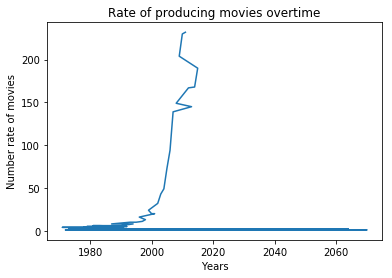

In [19]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["year"] = df["release_date"].dt.year
df_2=df["year"]
no_of_movies_per_year=df_2.value_counts()
plt.plot(no_of_movies_per_year) # most of the movies were produced between 2000 and 2020
plt.title("Rate of producing movies overtime")
plt.xlabel("Years")
plt.ylabel("Number rate of movies")

### Therefore the most number of produced movies is between 2000 and 2020

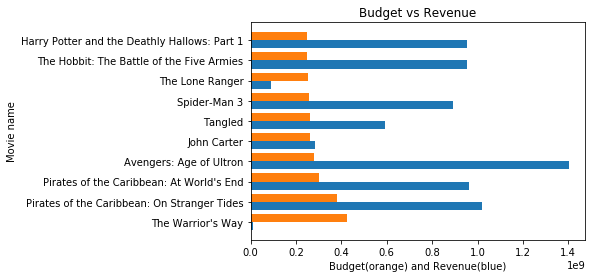

In [20]:
df_new3 = df.sort_values( ["budget"] , ascending=[False] ).head(10) # you can adjust the number of head as you want.

## A set of codes to make a bar chart to visualize our analysis.
rev=df_new3["revenue"]
bud=df_new3["budget"]
org_title=df_new3["original_title"]
ind=np.arange(len(org_title))
plt.barh(ind-0.2,rev ,height=0.4)
plt.barh(ind+0.2,bud,height=0.4)

plt.yticks(ind,org_title)
plt.title("Budget vs Revenue")
plt.xlabel("Budget(orange) and Revenue(blue)")
plt.ylabel("Movie name")
plt.show()

### The blue bar is the revenue while the orange bar is the budget.

### Here we find that (The Warrior's Way) movie is the highest budget movie but the least revenue movie.Therefore, it's not necessary that the film with high budget generate high profit.

<a id='conclusions'></a>
## Conclusions

> In the first section we have discussed the questions we mentioned before in the introduction. This analysis was based on the films rating , revenue and the budget.

> After that we found no relation between the film that have high rating and the film that makes high revenue. 

### Limitation 
> Some data was missing something like profit, I had to make an operation to calculate it and add it to the dataframe in order to help me in my analysis.
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [21]:
def main():
    while True:
        
        Q_1(df)
        Q_2(df)
        top_rating_movie(df)
        top_revenue_movie(df)
        top_budget_movie(df)
        
        
        break
    


if __name__ == "__main__":
	main()


Genres of movies that make highest profit :  Adventure|Fantasy|Action
The genres trending in that year :  Comedy
Top rating movie is :  7269    The Godfather
Name: original_title, dtype: object
Top revenue movie is :  1386    Avatar
Name: original_title, dtype: object
Top budget movie :  2244    The Warrior's Way
Name: original_title, dtype: object


In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0